# Proyek Analisis Data: [Bike Sharing]
- **Nama:** Fernando Manuel
- **Email:** m012b4ky1492@bangkit.academy
- **ID Dicoding:** fernandomanuelll

## Menentukan Pertanyaan Bisnis

- Siapa penyewa terbanyak di data peminjaman sepeda dan bagaimana rata-rata pengguna yang mempengaruhi penyewaan sepeda untuk antara casual dan registered ?
- Apakah pola penggunaan sepeda berbeda antara setiap Minggu dan setiap Bulan?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

## Data Wrangling
Ditahap ini kita menggunakan 3 proses Data Wrangling diantaranya adalah:

a. Gathering Data
Mengumpulkan semua data yang dibutuhkan untuk menjawab semua pertanyaan atau masalah yang dihadapi

b. Assesing Data
Penilaian terhadap data untuk menilai kualitas dan struktur data

c. Cleaning Data
Pembersihan data melalui analisis dari permasalahan

### Gathering Data
Pada tahap ini kita mengumpulkan data dan diubah menjadi DataFrame yang akan digunakan.

In [ ]:
df_day = pd.read_csv('https://raw.githubusercontent.com/CuPid168/bike_sharing_analysis/refs/heads/main/data/day.csv')
df_hour = pd.read_csv('https://raw.githubusercontent.com/CuPid168/bike_sharing_analysis/refs/heads/main/data/hour.csv')

Kemudian kita akan melihat struktur masing masing kedua DataFrame

In [ ]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset terbagi menjadi dua yaitu hour_df dalam setiap hari dan  basis hari day_df.
- Data dalam basis jam memiliki cakupan data yang lebih detail dan bisa dianalisis lebih mendetail, sedangkan data dalam basis hari memberikan gambaran yang lebih luas.


### Assessing Data
Langkah selanjutnya adalah melakukan penilaian kualitas data. Disini kita dapat mengetahui permasalahan dalam data yang dianalisis.

**ASSESSING DATA DF_DAY**

In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
df_day.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


In [ ]:
df_day.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
print("Jumlah duplikasi: ", df_day.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**ASSESING DATA DF_HOUR**

In [ ]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
df_hour.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [ ]:
df_hour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
print("Jumlah duplikasi: ", df_hour.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Hampir semua kategori menggunakan numerik sehingga masih sulit untuk dibaca
- Pada dteday harusnya berupa tanggal yang tipe data nya masih Object dan belum Datetime

### Cleaning Data
Pada tahap ini kita akan membetulkan permasalahan yang muncul pada saat kita melakukan assesing data.

In [ ]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
def change_category(df):
  season_map = {
      1: 'Spring',
      2: 'Summer',
      3: 'Fall',
      4: 'Winter'
  }
  df['season'] = df['season'].map(season_map)

  year_map = {0: 2011, 1: 2012}
  df['yr'] = df['yr'].map(year_map)

  month_map = {
      1: 'January',
      2: 'February',
      3: 'March',
      4: 'April',
      5: 'May',
      6: 'June',
      7: 'July',
      8: 'August',
      9: 'September',
      10: 'October',
      11: 'November',
      12: 'December'
  }
  df['mnth'] = df['mnth'].map(month_map)

  holiday_map = {0: 'no', 1: 'yes'}
  df['holiday'] = df['holiday'].map(holiday_map)

  weekday_map = {
      0: 'Sunday',
      1: 'Monday',
      2: 'Tuesday',
      3: 'Wednesday',
      4: 'Thursday',
      5: 'Friday',
      6: 'Saturday'
  }
  df['weekday'] = df['weekday'].map(weekday_map)

  workingday_map = {0: 'No', 1: 'Yes'}
  df['workingday'] = df['workingday'].map(workingday_map)

  weatherlist_map = {
      1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
      2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
      3: 'Light Snow, Light',
      4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
  }
  df['weathersit'] = df['weathersit'].map(weatherlist_map)

In [ ]:
change_category(df_day)
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,no,Saturday,No,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,no,Sunday,No,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,no,Monday,Yes,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,no,Tuesday,Yes,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,no,Wednesday,Yes,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [ ]:
change_category(df_hour)
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,no,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,no,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,no,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,no,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,no,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Beberapa kategori yang sulit dibaca sudah diubah dan mudah dibaca dengan menerapkan fungsi clean_category
- Tipe data dari dteday sudah diubah dari object menjadi datetime

## Exploratory Data Analysis (EDA)
Setelah melakukan penyelesaian masalah kita dapat melakukan eksplorasi dan sesuai dengan pertanyaan diawal.

*  Siapa penyewa terbanyak di data peminjaman sepeda dan bagaimana rata-rata pengguna yang mempengaruhi penyewaan sepeda untuk antara casual dan registered ?

*   Apakah pola penggunaan sepeda berbeda antara setiap Minggu dan setiap Bulan?

### Siapa penyewa terbanyak di data peminjaman sepeda dan bagaimana rata-rata pengguna yang mempengaruhi penyewaan sepeda untuk antara casual dan registered ?

Pertima kita perlu melihat jumlah pengguna casual dan registered berdasarkan jam yang diurutkan secara menaik atau ascending dari registered.

In [ ]:
df_hour.groupby('hr').agg({
    'casual': 'sum',
    'registered': 'sum'
}).sort_values(by='registered', ascending=True)

,casual,registered
hr,,
4,874,3554
3,1893,6281
2,3412,12940
5,1012,13249
1,4709,19455
0,7375,31755
6,3017,52115
23,11065,52876
22,16200,79412


Kemudian kita perlu mengetahui pengguna berdasarkan musim , holiday, dan weekday

In [ ]:
df_hour.groupby('season').agg({
    'casual': 'sum',
    'registered': 'sum'
})

,casual,registered
season,,
Fall,226091,835038
Spring,60622,410726
Summer,203522,715067
Winter,129782,711831


In [ ]:
df_hour.groupby('holiday').agg({
    'casual': 'sum',
    'registered': 'sum'
})

,casual,registered
holiday,,
no,597658,2616586
yes,22359,56076


In [ ]:
df_hour.groupby('workingday').agg({
    'casual': 'sum',
    'registered': 'sum'
})

,casual,registered
workingday,,
No,316732,683537
Yes,303285,1989125


In [ ]:
df_hour.groupby('weekday').agg({
    'casual': 'sum',
    'registered': 'sum'
})

,casual,registered
weekday,,
Friday,78238,409552
Monday,70784,384719
Saturday,153852,323955
Sunday,140521,303506
Thursday,61460,423935
Tuesday,57843,411266
Wednesday,57319,415729


### Explore 2 Apakah pola penggunaan sepeda berbeda antara setiap Minggu dan setiap Bulan?

Kita melihat pola pada hari kerja dan libur

In [ ]:
df_day.groupby('workingday')['cnt'].sum().sort_values(ascending=False)

,cnt
workingday,
Yes,2292410
No,1000269


In [ ]:
df_day.groupby('holiday')['cnt'].sum().sort_values(ascending=False)

,cnt
holiday,
no,3214244
yes,78435


**Insight:**
- Penyewa registeted merupakan pekerja karena jumlah penyewa tinggi dihari kerja. Sedangkan casual sangat stabil
- Penyewa lebih banyak pada saat hari kerja pada saat liburan

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Siapa penyewa terbanyak di data peminjaman sepeda dan bagaimana rata-rata pengguna yang mempengaruhi penyewaan sepeda untuk antara casual dan registered ?

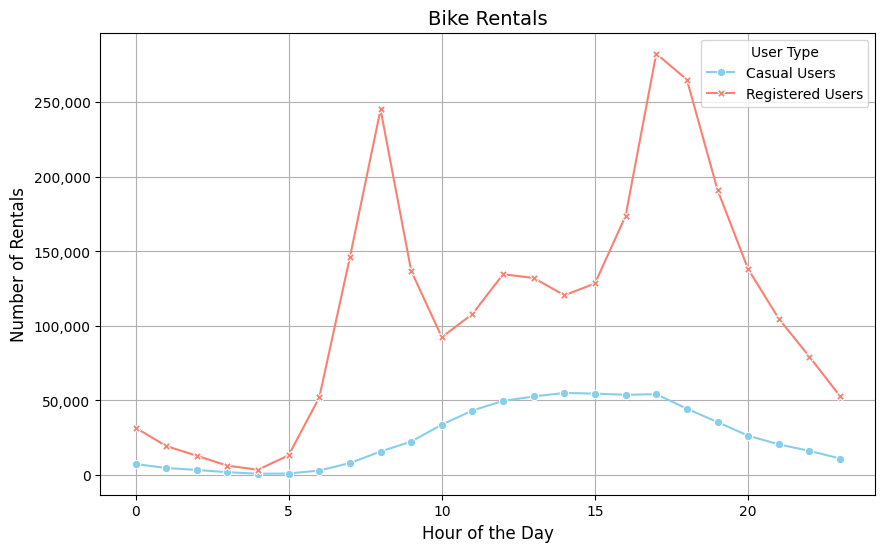

In [ ]:
tenants_df = df_hour.groupby('hr').agg({
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()

plt.figure(figsize=(10, 6))

sns.lineplot(x='hr', y='casual', data=tenants_df, label='Casual Users', marker='o', color='skyblue')
sns.lineplot(x='hr', y='registered', data=tenants_df, label='Registered Users', marker='X', color='salmon')

plt.title('Bike Rentals', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Rentals', fontsize=12)
plt.grid(True)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.legend(title='User Type')

<Figure size 800x500 with 0 Axes>

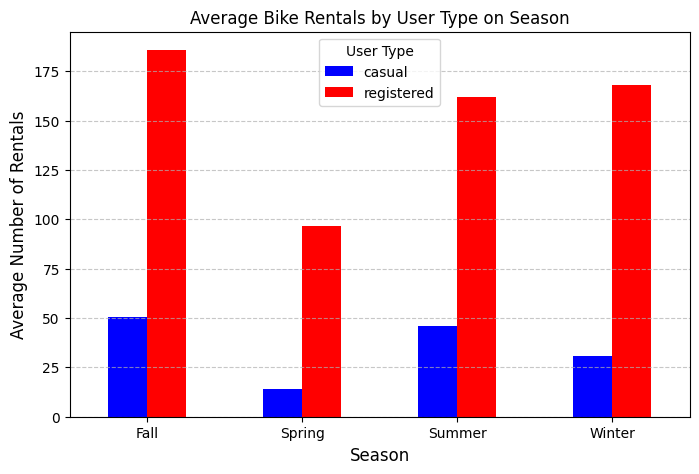

In [ ]:
tenant_season = df_hour.groupby('season').agg({
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()

plt.figure(figsize=(8, 5))

tenant_season.set_index('season')[['casual', 'registered']].plot(kind='bar', figsize=(8,5), color=['blue', 'red'])

plt.title('Average Bike Rentals by User Type on Season', fontsize=12)
plt.xlabel('Season', fontsize=12)
plt.xticks(rotation=0)
plt.ylabel('Average Number of Rentals', fontsize=12)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.legend(title='User Type')

<Figure size 800x500 with 0 Axes>

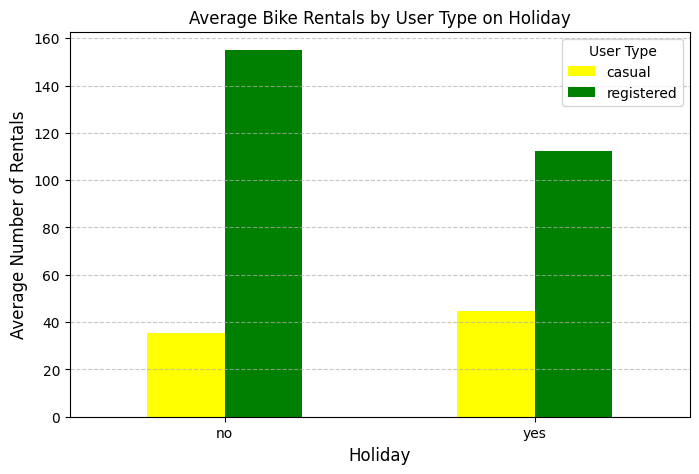

In [ ]:
tenants_holiday = df_hour.groupby('holiday').agg({
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()

plt.figure(figsize=(8, 5))

tenants_holiday.set_index('holiday')[['casual', 'registered']].plot(kind='bar', figsize=(8,5), color=['yellow', 'green'])

plt.title('Average Bike Rentals by User Type on Holiday', fontsize=12)
plt.xlabel('Holiday', fontsize=12)
plt.xticks(rotation=0)
plt.ylabel('Average Number of Rentals', fontsize=12)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.legend(title='User Type')

<Figure size 800x500 with 0 Axes>

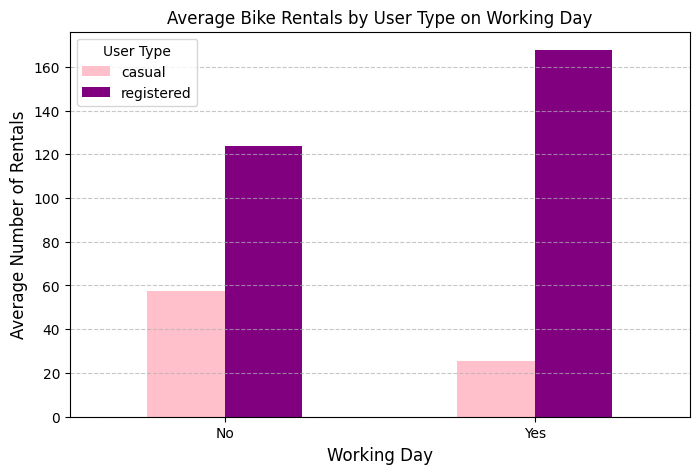

In [ ]:
tenants_workingday = df_hour.groupby('workingday').agg({
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()

plt.figure(figsize=(8, 5))

tenants_workingday.set_index('workingday')[['casual', 'registered']].plot(kind='bar', figsize=(8,5), color=['pink', 'purple'])

plt.title('Average Bike Rentals by User Type on Working Day', fontsize=12)
plt.xlabel('Working Day', fontsize=12)
plt.xticks(rotation=0)
plt.ylabel('Average Number of Rentals', fontsize=12)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.legend(title='User Type')

<Figure size 800x500 with 0 Axes>

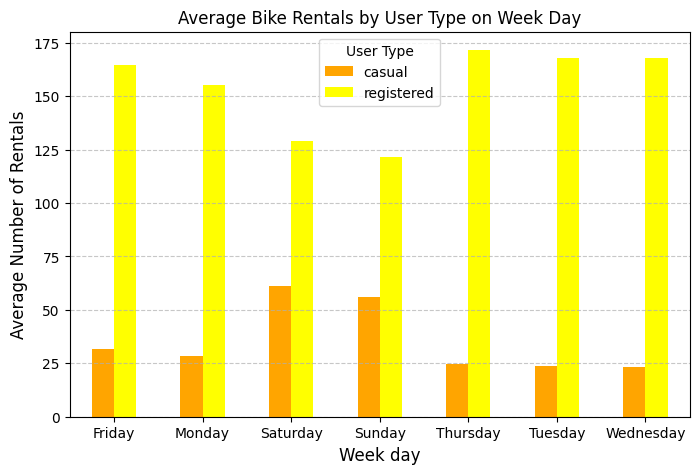

In [ ]:
tenants_weekday = df_hour.groupby('weekday').agg({
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()

plt.figure(figsize=(8, 5))

tenants_weekday.set_index('weekday')[['casual', 'registered']].plot(kind='bar', figsize=(8,5), color=['orange', 'yellow'])

plt.title('Average Bike Rentals by User Type on Week Day', fontsize=12)
plt.xlabel('Week day', fontsize=12)
plt.xticks(rotation=0)
plt.ylabel('Average Number of Rentals', fontsize=12)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.legend(title='User Type')

### Pertanyaan 2:
Apakah pola penggunaan sepeda berbeda antara setiap Minggu dan setiap Bulan?

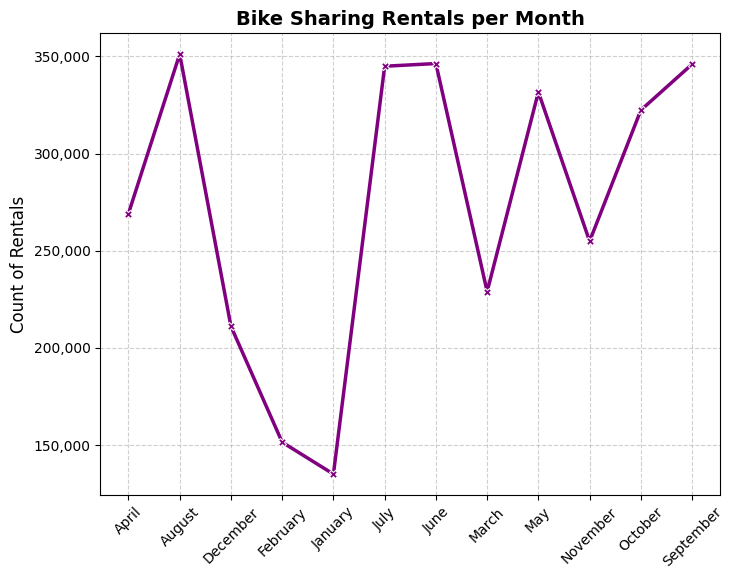

In [ ]:
month_tenant_df = df_day.groupby('mnth')['cnt'].sum().reset_index()

plt.figure(figsize=(8, 6))

sns.lineplot(x='mnth', y='cnt', data=month_tenant_df, marker="X", linewidth=2.5, color='purple')

plt.title('Bike Sharing Rentals per Month', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.xticks(rotation=45)
plt.ylabel('Count of Rentals', fontsize=12)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.grid(True, linestyle='--', alpha=0.6)

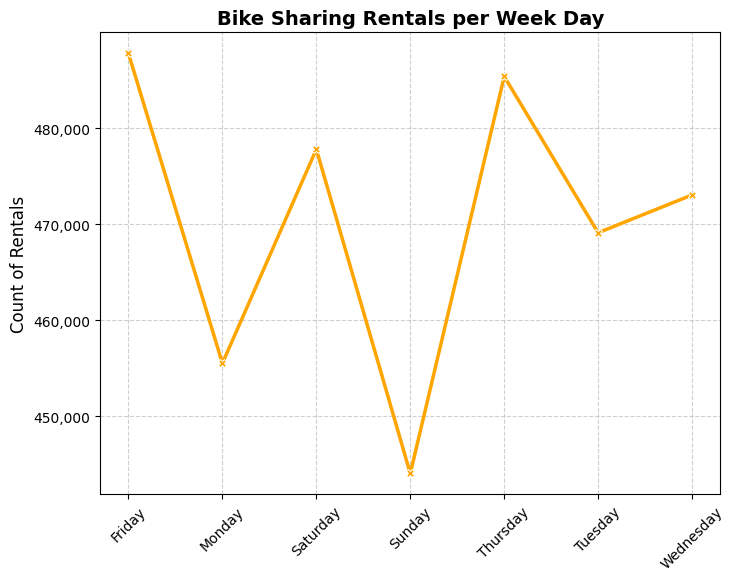

In [ ]:
weekday_tenant_df = df_day.groupby('weekday')['cnt'].sum().reset_index()

plt.figure(figsize=(8, 6))

sns.lineplot(x='weekday', y='cnt', data=weekday_tenant_df, marker="X", linewidth=2.5, color='orange')

plt.title('Bike Sharing Rentals per Week Day', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.xticks(rotation=45)
plt.ylabel('Count of Rentals', fontsize=12)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.grid(True, linestyle='--', alpha=0.6)

**Insight:**
- Penggunaan chart mempermudah dalam melihat data terutama perbedaan peminjam setiap kategori
- Kita dapat tahu perbedaan pola grafik dari peminjam setiap Minggu dan setiap Bulannya.

## Conclusion

- Conclution pertanyaan 1

  Disini kita dapat menemukan bahwa sebagian besar penyewa sepeda yang terdaftar merupakan pekerja karena banyak peminjam yang naik dengan kenaikan jumlah rata-rata penyewa pada hari kerja dibandingkan hari libur. Dan dapat disimpulkan Rata - rata yang dikeluarkan dari setiap kategori akan berbeda.

- Conclution pertanyaan 2

  Kita dapat tahu grafik setiap kategori tidak akan sama dan sangat kemungkinan kecil akan sama, sehingga kita tidak dapat langsung menyimpulkan kesamaan setiap kategori.